<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=10907d175c9cde76d1632fbdaa7062759ee954b6338d67be992f82e309141767
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import plotly.graph_objects as go
from numpy.core._multiarray_umath  import  ndarray
from matplotlib import cm

In [3]:
slope = ctrl.Antecedent(np.arange(0, 100 + 1, 1), 'slope')
impervious = ctrl.Antecedent(np.arange(0, 100 + 0.1, 0.1), 'impervious')
catchment_category = ctrl.Consequent(np.arange(1, 101, 1), 'category')

13.999999999999998


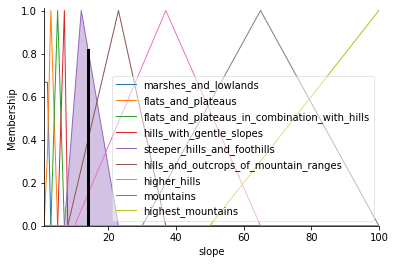

In [4]:
class LandUse:
    marshes_and_lowlands=1,
    flats_and_plateaus= 2,
    flats_and_plateaus_in_combination_with_hills= 3,
    hills_with_gentle_slopes= 4
    steeper_hills_and_foothills =5
    hills_and_outcrops_of_mountain_ranges=6
    higher_hills=7
    mountains=8
    highest_mountains=9
    
    
class LandForm:
    in_medium_conditions=1
    in_permeable_areas=2
    in_permeable_terrain_on_plains=3
    in_hilly_terrain=4
    in_mountainous_terrain=5
    on_bare_rocky_slopes=6
    urban=7
    suburban=8
    rural=9
    forests=10
    meadows=11
    arable_land=12
    marshes=13

land_use_type = ctrl.Antecedent(np.arange(0, 10, 1), 'land_use')
land_form_type = ctrl.Antecedent(np.arange(0, 14, 1), 'land_form')
slope = ctrl.Consequent(np.arange(1, 101, 1), 'slope')
impervious = ctrl.Consequent(np.arange(1, 101, 1), 'impervious')

# Populate land use type with membership functions.
land_use_type['marshes_and_lowlands'] = fuzz.trimf(land_use_type.universe, [0, 1, 2])
land_use_type['flats_and_plateaus'] = fuzz.trimf(land_use_type.universe, [1, 2, 3])
land_use_type['flats_and_plateaus_in_combination_with_hills'] = fuzz.trimf(land_use_type.universe, [2, 3, 4])
land_use_type['hills_with_gentle_slopes'] = fuzz.trimf(land_use_type.universe, [3, 4, 5])
land_use_type['steeper_hills_and_foothills'] = fuzz.trimf(land_use_type.universe, [4, 5, 6])
land_use_type['hills_and_outcrops_of_mountain_ranges'] = fuzz.trimf(land_use_type.universe, [5, 6, 7])
land_use_type['higher_hills'] = fuzz.trimf(land_use_type.universe, [6, 7, 8])
land_use_type['mountains'] = fuzz.trimf(land_use_type.universe, [7, 8, 9])
land_use_type['highest_mountains'] = fuzz.trimf(land_use_type.universe, [8, 9, 10])

# Populate land form type with membership functions.
land_form_type['in_medium_conditions'] = fuzz.trimf(land_form_type.universe, [0, 1, 2])
land_form_type['in_permeable_areas'] = fuzz.trimf(land_form_type.universe, [1, 2, 3])
land_form_type['in_permeable_terrain_on_plains'] = fuzz.trimf(land_form_type.universe, [2, 3, 4])
land_form_type['in_hilly_terrain'] = fuzz.trimf(land_form_type.universe, [3, 4, 5])
land_form_type['in_mountainous_terrain'] = fuzz.trimf(land_form_type.universe, [4, 5, 6])
land_form_type['on_bare_rocky_slopes'] = fuzz.trimf(land_form_type.universe, [5, 6, 7])
land_form_type['urban'] = fuzz.trimf(land_form_type.universe, [6, 7, 8])
land_form_type['suburban'] = fuzz.trimf(land_form_type.universe, [7, 8, 9])
land_form_type['rural'] = fuzz.trimf(land_form_type.universe, [8, 9, 10])
land_form_type['forests'] = fuzz.trimf(land_form_type.universe, [9, 10, 11])
land_form_type['meadows'] = fuzz.trimf(land_form_type.universe, [10, 11, 12])
land_form_type['arable_land'] = fuzz.trimf(land_form_type.universe, [11, 12, 13])
land_form_type['marshes'] = fuzz.trimf(land_form_type.universe, [12, 13, 14])


# Populate slope with membership functions.
slope['marshes_and_lowlands'] = fuzz.trimf(slope.universe, [0, 1.5, 3])
slope['flats_and_plateaus'] = fuzz.trimf(slope.universe, [1.5, 3, 5])
slope['flats_and_plateaus_in_combination_with_hills'] = fuzz.trimf(slope.universe, [3, 5, 7])
slope['hills_with_gentle_slopes'] = fuzz.trimf(slope.universe, [5, 7, 8])
slope['steeper_hills_and_foothills'] = fuzz.trimf(slope.universe, [7, 12, 23])
slope['hills_and_outcrops_of_mountain_ranges'] = fuzz.trimf(slope.universe, [8, 23, 37])
slope['higher_hills'] = fuzz.trimf(slope.universe, [10, 37, 65])
slope['mountains'] = fuzz.trimf(slope.universe, [30, 65, 100])
slope['highest_mountains'] = fuzz.trimf(slope.universe, [50, 100, 100])

# Populate slope with membership functions.
impervious['marshes_and_lowlands'] = fuzz.trimf(impervious.universe, [50, 100, 100])
impervious['flats_and_plateaus'] = fuzz.trimf(impervious.universe, [30, 65, 100])
impervious['flats_and_plateaus_in_combination_with_hills'] = fuzz.trimf(impervious.universe, [25, 30, 35])
impervious['hills_with_gentle_slopes'] = fuzz.trimf(impervious.universe, [20, 25, 30])
impervious['steeper_hills_and_foothills'] = fuzz.trimf(impervious.universe, [15, 20, 25])
impervious['hills_and_outcrops_of_mountain_ranges'] = fuzz.trimf(impervious.universe, [10, 15, 20])
impervious['higher_hills'] = fuzz.trimf(impervious.universe, [5, 10, 15])
impervious['mountains'] = fuzz.trimf(impervious.universe, [0, 5, 10])
impervious['highest_mountains'] = fuzz.trimf(impervious.universe, [0, 0, 5])


# Define rules for slope
rule9 = ctrl.Rule(antecedent=((land_use_type['highest_mountains']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['highest_mountains']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_medium_conditions']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_mountainous_terrain'])),
                  consequent=slope['highest_mountains'])

rule8 = ctrl.Rule(antecedent=((land_use_type['mountains']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['mountains']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['mountains']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['highest_mountains']    & land_form_type['in_permeable_areas']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_permeable_terrain_on_plains'])),
                  consequent=slope['mountains'])

rule7 = ctrl.Rule(antecedent=(  (land_use_type['higher_hills']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['higher_hills']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['higher_hills']    & land_form_type['urban']) |
                                (land_use_type['higher_hills']    & land_form_type['suburban']) |
                                (land_use_type['higher_hills']    & land_form_type['rural']) |
                                (land_use_type['higher_hills']    & land_form_type['forests']) |
                                (land_use_type['higher_hills']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['hills_with_gentle_slopes']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['higher_hills']    & land_form_type['arable_land']) |
                                (land_use_type['higher_hills']    & land_form_type['marshes']) |
                                (land_use_type['mountains']    & land_form_type['in_permeable_terrain_on_plains']) |
                                (land_use_type['mountains']    & land_form_type['forests']) |
                                (land_use_type['mountains']    & land_form_type['meadows']) |
                                (land_use_type['mountains']    & land_form_type['arable_land']) |
                                (land_use_type['mountains']    & land_form_type['marshes']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['on_bare_rocky_slopes'])),
                  consequent=slope['higher_hills'])

rule6 = ctrl.Rule(antecedent=((land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_medium_conditions']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_permeable_terrain_on_plains']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_permeable_areas']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['urban']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['suburban']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['rural']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['forests']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['meadows']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['arable_land']) |
                              (land_use_type['highest_mountains']    & land_form_type['urban']) |
                              (land_use_type['highest_mountains']    & land_form_type['suburban']) |
                              (land_use_type['highest_mountains']    & land_form_type['rural']) |
                              (land_use_type['highest_mountains']    & land_form_type['forests'])|
                              (land_use_type['highest_mountains']    & land_form_type['arable_land'])|
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_mountainous_terrain'])),
                  consequent=slope['hills_and_outcrops_of_mountain_ranges'])


rule5 = ctrl.Rule(antecedent=(  (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_medium_conditions'])    |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_permeable_areas'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_permeable_terrain_on_plains'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_mountainous_terrain'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['on_bare_rocky_slopes'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_hilly_terrain'])        |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['forests'])                 |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['rural'])                   |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['urban'])                   |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['mountains']    & land_form_type['arable_land'])|
                                (land_use_type['mountains']    & land_form_type['marshes'])|
                                (land_use_type['highest_mountains']    & land_form_type['meadows'])|
                                (land_use_type['highest_mountains']    & land_form_type['forests'])|
                                (land_use_type['highest_mountains']    & land_form_type['marshes'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['higher_hills']    & land_form_type['in_permeable_terrain_on_plains'])|
                                (land_use_type['higher_hills']    & land_form_type['in_permeable_areas'])|
                                (land_use_type['higher_hills']    & land_form_type['in_medium_conditions'])|
                                (land_use_type['mountains']       & land_form_type['in_medium_conditions'])|
                                (land_use_type['mountains']       & land_form_type['in_permeable_areas'])|
                                (land_use_type['mountains']       & land_form_type['meadows'])|
                                (land_use_type['mountains']       & land_form_type['urban'])|
                                (land_use_type['mountains']       & land_form_type['suburban'])|
                                (land_use_type['mountains']       & land_form_type['rural'])),
                  consequent=slope['steeper_hills_and_foothills'])


rule4 = ctrl.Rule(antecedent=((land_use_type['hills_with_gentle_slopes']    & land_form_type['in_medium_conditions'])   |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_permeable_areas'])     |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_permeable_terrain_on_plains'])     |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_hilly_terrain'])       |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_mountainous_terrain'])       |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['forests'])                |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['rural'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['rural'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['urban'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['marshes'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['meadows'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['arable_land'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['suburban'])),
                  consequent=slope['hills_with_gentle_slopes'])

rule3 = ctrl.Rule(antecedent=(  (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_medium_conditions'])   |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_permeable_areas'])     |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['rural'])                  |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['forests'])                |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['arable_land'])            |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_permeable_terrain_on_plains'])            |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['marshes'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['meadows'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['meadows']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['arable_land']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['marshes']) |
                                (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['marshes']) |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_hilly_terrain'])|
                                (land_use_type['higher_hills']    & land_form_type['meadows'])|
                                (land_use_type['higher_hills']    & land_form_type['arable_land'])|
                                (land_use_type['higher_hills']    & land_form_type['marshes'])),
                  consequent=slope['flats_and_plateaus_in_combination_with_hills'])

rule2 = ctrl.Rule(antecedent=(  (land_use_type['flats_and_plateaus']    & land_form_type['in_medium_conditions'])     |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_permeable_areas'])       |
                                (land_use_type['flats_and_plateaus']    & land_form_type['rural'])                    |
                                (land_use_type['flats_and_plateaus']    & land_form_type['forests'])                  |
                                (land_use_type['flats_and_plateaus']    & land_form_type['arable_land'])              |
                                (land_use_type['flats_and_plateaus']    & land_form_type['meadows'])                  |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_permeable_terrain_on_plains'])|
                                (land_use_type['flats_and_plateaus']    & land_form_type['marshes'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['urban']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['urban']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['suburban']) |
                                (land_use_type['marshes_and_lowlands']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['urban'])),
                  consequent=slope['flats_and_plateaus'])

rule1 = ctrl.Rule(antecedent=((land_use_type['marshes_and_lowlands']    & land_form_type['in_medium_conditions'])               |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['in_permeable_areas'])                 |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['in_permeable_terrain_on_plains'])     |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['rural'])                              |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['forests'])                            |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['arable_land'])                        |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['meadows'])                            |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['marshes'])),
                  consequent=slope['marshes_and_lowlands'])




simulation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# compute
simulation = ctrl.ControlSystemSimulation(simulation_ctrl)

# calculate slope
simulation.input['land_use'] = LandUse.higher_hills
simulation.input['land_form'] = LandForm.in_permeable_areas
# categories.input['impervious'] = 10
# result slope
simulation.compute()
result = simulation.output['slope']

print(result)
slope.view(sim=simulation)

In [5]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 10.1, 1)
land_form_type = np.arange(0, 14.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulation.input['land_use'] = i
        simulation.input['land_form'] = j
        simulation.compute()
        pred_val[j][i] = simulation.output['slope']

fig = go.Figure(data=[
    go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Slope evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Slope evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

In [6]:
def get_populate(result):
    populate = {
        'marshes_and_lowlands': fuzz.interp_membership(slope.universe, slope['marshes_and_lowlands'].mf, result),
        'flats_and_plateaus': fuzz.interp_membership(slope.universe, slope['flats_and_plateaus'].mf, result),
        'flats_and_plateaus_in_combination_with_hills': fuzz.interp_membership(slope.universe, slope['flats_and_plateaus_in_combination_with_hills'].mf, result),
        'hills_with_gentle_slopes': fuzz.interp_membership(slope.universe, slope['hills_with_gentle_slopes'].mf, result),
        'steeper_hills_and_foothills': fuzz.interp_membership(slope.universe, slope['steeper_hills_and_foothills'].mf, result),
        'hills_and_outcrops_of_mountain_ranges': fuzz.interp_membership(slope.universe, slope['hills_and_outcrops_of_mountain_ranges'].mf, result),
        'higher_hills': fuzz.interp_membership(slope.universe, slope['higher_hills'].mf, result),
        'mountains': fuzz.interp_membership(slope.universe, slope['mountains'].mf, result),
        'highest_mountains': fuzz.interp_membership(slope.universe, slope['highest_mountains'].mf, result),
    }
    max_populate = max(populate, key=populate.get)
    return max_populate
print(get_populate(result=result))

steeper_hills_and_foothills


10.000000000000002


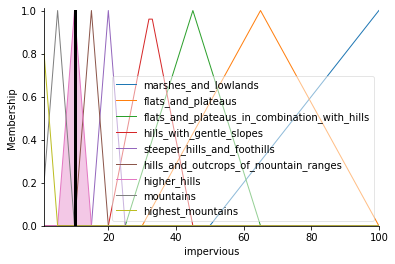

In [7]:
land_use_type = ctrl.Antecedent(np.arange(0, 10, 1), 'land_use')
land_form_type = ctrl.Antecedent(np.arange(0, 14, 1), 'land_form')
impervious = ctrl.Consequent(np.arange(1, 101, 1), 'impervious')

# Populate land use type with membership functions.
land_use_type['marshes_and_lowlands'] = fuzz.trimf(land_use_type.universe, [0, 1, 2])
land_use_type['flats_and_plateaus'] = fuzz.trimf(land_use_type.universe, [1, 2, 3])
land_use_type['flats_and_plateaus_in_combination_with_hills'] = fuzz.trimf(land_use_type.universe, [2, 3, 4])
land_use_type['hills_with_gentle_slopes'] = fuzz.trimf(land_use_type.universe, [3, 4, 5])
land_use_type['steeper_hills_and_foothills'] = fuzz.trimf(land_use_type.universe, [4, 5, 6])
land_use_type['hills_and_outcrops_of_mountain_ranges'] = fuzz.trimf(land_use_type.universe, [5, 6, 7])
land_use_type['higher_hills'] = fuzz.trimf(land_use_type.universe, [6, 7, 8])
land_use_type['mountains'] = fuzz.trimf(land_use_type.universe, [7, 8, 9])
land_use_type['highest_mountains'] = fuzz.trimf(land_use_type.universe, [8, 9, 10])

# Populate land form type with membership functions.
land_form_type['in_medium_conditions'] = fuzz.trimf(land_form_type.universe, [0, 1, 2])
land_form_type['in_permeable_areas'] = fuzz.trimf(land_form_type.universe, [1, 2, 3])
land_form_type['in_permeable_terrain_on_plains'] = fuzz.trimf(land_form_type.universe, [2, 3, 4])
land_form_type['in_hilly_terrain'] = fuzz.trimf(land_form_type.universe, [3, 4, 5])
land_form_type['in_mountainous_terrain'] = fuzz.trimf(land_form_type.universe, [4, 5, 6])
land_form_type['on_bare_rocky_slopes'] = fuzz.trimf(land_form_type.universe, [5, 6, 7])
land_form_type['urban'] = fuzz.trimf(land_form_type.universe, [6, 7, 8])
land_form_type['suburban'] = fuzz.trimf(land_form_type.universe, [7, 8, 9])
land_form_type['rural'] = fuzz.trimf(land_form_type.universe, [8, 9, 10])
land_form_type['forests'] = fuzz.trimf(land_form_type.universe, [9, 10, 11])
land_form_type['meadows'] = fuzz.trimf(land_form_type.universe, [10, 11, 12])
land_form_type['arable_land'] = fuzz.trimf(land_form_type.universe, [11, 12, 13])
land_form_type['marshes'] = fuzz.trimf(land_form_type.universe, [12, 13, 14])

# Populate slope with membership functions.
impervious['marshes_and_lowlands'] = fuzz.trimf(impervious.universe, [50, 100, 100])
impervious['flats_and_plateaus'] = fuzz.trimf(impervious.universe, [30, 65, 100])
impervious['flats_and_plateaus_in_combination_with_hills'] = fuzz.trimf(impervious.universe, [25, 45, 65])
impervious['hills_with_gentle_slopes'] = fuzz.trimf(impervious.universe, [20, 32.5, 45])
impervious['steeper_hills_and_foothills'] = fuzz.trimf(impervious.universe, [15, 20, 25])
impervious['hills_and_outcrops_of_mountain_ranges'] = fuzz.trimf(impervious.universe, [10, 15, 20])
impervious['higher_hills'] = fuzz.trimf(impervious.universe, [5, 10, 15])
impervious['mountains'] = fuzz.trimf(impervious.universe, [0, 5, 10])
impervious['highest_mountains'] = fuzz.trimf(impervious.universe, [0, 0, 5])


# Define rules for slope
rule9 = ctrl.Rule(antecedent=((land_use_type['highest_mountains']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['highest_mountains']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_medium_conditions']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_mountainous_terrain'])),
                  consequent=impervious['highest_mountains'])

rule8 = ctrl.Rule(antecedent=((land_use_type['mountains']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['mountains']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['mountains']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['highest_mountains']    & land_form_type['in_permeable_areas']) |
                              (land_use_type['highest_mountains']    & land_form_type['in_permeable_terrain_on_plains'])),
                  consequent=impervious['mountains'])

rule7 = ctrl.Rule(antecedent=(  (land_use_type['higher_hills']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['higher_hills']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['higher_hills']    & land_form_type['urban']) |
                                (land_use_type['higher_hills']    & land_form_type['suburban']) |
                                (land_use_type['higher_hills']    & land_form_type['rural']) |
                                (land_use_type['higher_hills']    & land_form_type['forests']) |
                                (land_use_type['higher_hills']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['hills_with_gentle_slopes']    & land_form_type['on_bare_rocky_slopes']) |
                                (land_use_type['higher_hills']    & land_form_type['arable_land']) |
                                (land_use_type['higher_hills']    & land_form_type['marshes']) |
                                (land_use_type['mountains']    & land_form_type['in_permeable_terrain_on_plains']) |
                                (land_use_type['mountains']    & land_form_type['forests']) |
                                (land_use_type['mountains']    & land_form_type['meadows']) |
                                (land_use_type['mountains']    & land_form_type['arable_land']) |
                                (land_use_type['mountains']    & land_form_type['marshes']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['on_bare_rocky_slopes'])),
                  consequent=impervious['higher_hills'])

rule6 = ctrl.Rule(antecedent=((land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_hilly_terrain']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['on_bare_rocky_slopes']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_medium_conditions']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_permeable_terrain_on_plains']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_permeable_areas']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['urban']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['suburban']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['rural']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['forests']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['meadows']) |
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['arable_land']) |
                              (land_use_type['highest_mountains']    & land_form_type['urban']) |
                              (land_use_type['highest_mountains']    & land_form_type['suburban']) |
                              (land_use_type['highest_mountains']    & land_form_type['rural']) |
                              (land_use_type['highest_mountains']    & land_form_type['forests'])|
                              (land_use_type['highest_mountains']    & land_form_type['arable_land'])|
                              (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['in_mountainous_terrain'])),
                  consequent=impervious['hills_and_outcrops_of_mountain_ranges'])


rule5 = ctrl.Rule(antecedent=(  (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_medium_conditions'])    |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_permeable_areas'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_permeable_terrain_on_plains'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_mountainous_terrain'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['on_bare_rocky_slopes'])      |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['in_hilly_terrain'])        |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['forests'])                 |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['rural'])                   |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['urban'])                   |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['mountains']    & land_form_type['arable_land'])|
                                (land_use_type['mountains']    & land_form_type['marshes'])|
                                (land_use_type['highest_mountains']    & land_form_type['meadows'])|
                                (land_use_type['highest_mountains']    & land_form_type['forests'])|
                                (land_use_type['highest_mountains']    & land_form_type['marshes'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['in_mountainous_terrain'])|
                                (land_use_type['higher_hills']    & land_form_type['in_permeable_terrain_on_plains'])|
                                (land_use_type['higher_hills']    & land_form_type['in_permeable_areas'])|
                                (land_use_type['higher_hills']    & land_form_type['in_medium_conditions'])|
                                (land_use_type['mountains']       & land_form_type['in_medium_conditions'])|
                                (land_use_type['mountains']       & land_form_type['in_permeable_areas'])|
                                (land_use_type['mountains']       & land_form_type['meadows'])|
                                (land_use_type['mountains']       & land_form_type['urban'])|
                                (land_use_type['mountains']       & land_form_type['suburban'])|
                                (land_use_type['mountains']       & land_form_type['rural'])),
                  consequent=impervious['steeper_hills_and_foothills'])


rule4 = ctrl.Rule(antecedent=((land_use_type['hills_with_gentle_slopes']    & land_form_type['in_medium_conditions'])   |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_permeable_areas'])     |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_permeable_terrain_on_plains'])     |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_hilly_terrain'])       |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_mountainous_terrain'])       |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['forests'])                |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['rural'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['rural'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['urban'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['marshes'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['meadows'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['arable_land'])                  |
                              (land_use_type['hills_with_gentle_slopes']    & land_form_type['suburban'])),
                  consequent=impervious['hills_with_gentle_slopes'])

rule3 = ctrl.Rule(antecedent=(  (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_medium_conditions'])   |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_permeable_areas'])     |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['rural'])                  |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['forests'])                |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['arable_land'])            |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_permeable_terrain_on_plains'])            |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['marshes'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['meadows'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['hills_with_gentle_slopes']    & land_form_type['in_hilly_terrain']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['meadows']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['arable_land']) |
                                (land_use_type['steeper_hills_and_foothills']    & land_form_type['marshes']) |
                                (land_use_type['hills_and_outcrops_of_mountain_ranges']    & land_form_type['marshes']) |
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['in_hilly_terrain'])|
                                (land_use_type['higher_hills']    & land_form_type['meadows'])|
                                (land_use_type['higher_hills']    & land_form_type['arable_land'])|
                                (land_use_type['higher_hills']    & land_form_type['marshes'])),
                  consequent=impervious['flats_and_plateaus_in_combination_with_hills'])

rule2 = ctrl.Rule(antecedent=(  (land_use_type['flats_and_plateaus']    & land_form_type['in_medium_conditions'])     |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_permeable_areas'])       |
                                (land_use_type['flats_and_plateaus']    & land_form_type['rural'])                    |
                                (land_use_type['flats_and_plateaus']    & land_form_type['forests'])                  |
                                (land_use_type['flats_and_plateaus']    & land_form_type['arable_land'])              |
                                (land_use_type['flats_and_plateaus']    & land_form_type['meadows'])                  |
                                (land_use_type['flats_and_plateaus']    & land_form_type['in_permeable_terrain_on_plains'])|
                                (land_use_type['flats_and_plateaus']    & land_form_type['marshes'])|
                                (land_use_type['marshes_and_lowlands']    & land_form_type['urban']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['urban']) |
                                (land_use_type['flats_and_plateaus']    & land_form_type['suburban']) |
                                (land_use_type['marshes_and_lowlands']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['suburban'])|
                                (land_use_type['flats_and_plateaus_in_combination_with_hills']    & land_form_type['urban'])),
                  consequent=impervious['flats_and_plateaus'])

rule1 = ctrl.Rule(antecedent=((land_use_type['marshes_and_lowlands']    & land_form_type['in_medium_conditions'])               |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['in_permeable_areas'])                 |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['in_permeable_terrain_on_plains'])     |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['rural'])                              |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['forests'])                            |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['arable_land'])                        |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['meadows'])                            |
                              (land_use_type['marshes_and_lowlands']    & land_form_type['marshes'])),
                  consequent=impervious['marshes_and_lowlands'])


simulation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# compute
simulation = ctrl.ControlSystemSimulation(simulation_ctrl)

# calculate impervious
simulation.input['land_use'] = LandUse.marshes_and_lowlands
simulation.input['land_form'] = LandForm.on_bare_rocky_slopes
# result slope
simulation.compute()
res_imperv = simulation.output['impervious']

print(res_imperv)
impervious.view(sim=simulation)

In [55]:
# x = land_use_type
# y = land_form_type

land_use_type = np.arange(0, 10.1, 1)
land_form_type = np.arange(0, 14.1, 1)
land_use_type, land_form_type = np.meshgrid(land_use_type, land_form_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_form_type), len(land_form_type[1])))

for i in range(1, len(land_use_type[1])):
    for j in range(1, len(land_form_type)):
        simulation.input['land_use'] = i
        simulation.input['land_form'] = j
        simulation.compute()
        pred_val[j][i] = simulation.output['impervious']

fig = go.Figure(go.Surface(x=land_use_type, y=land_form_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    ))
fig.update_layout(title='Impervious evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land use [‰]',
                      yaxis_title='Land form [m/s]',
                      zaxis_title='Impervious evaluation'),
                  autosize=True,
                  width=900, height=900,)
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))

fig.show()

[[-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]
 [-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]
 [-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]
 ...
 [-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]
 [-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]
 [-1.         -0.96969697 -0.93939394 ...  1.93939394  1.96969697
   2.        ]]
